# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Amanda Chung
- Christine Fann
- Darren Liu
- Kai-ling Peng
- Priscila Romero

# Group Members IDs

- A########
- A########
- A15040930
- A14796023
- A########

# Research Question

What is the relationship between a college major and post-graduate success?
- What are the most successful majors?
    - Is there a relationship between employment rate and median income?
- How does graduating with a certain major impact one's future career in pursuing further education or job opportunities? 
    - Quantify based on full time jobs that require a degree vs. jobs that don’t require a degree
    - Part time vs Full time rates
- What is the male to female ratio for popular majors? Percentage of women vs median income.


## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

All our datasets are from https://github.com/fivethirtyeight/data/tree/master/college-majors

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import linregress

In [2]:
# read datasets
all_ages = pd.read_csv('data/all-ages.csv')
grad_students = pd.read_csv('data/grad-students.csv')
recent_grads = pd.read_csv('data/recent-grads.csv')
women_stem = pd.read_csv('data/women-stem.csv')

# Data Cleaning
Clean `all_ages` by extracting wanted columns, converting some quantitative columns to proportions, and adding part/full time data from `recent_grads`

In [3]:
## describe all_ages dataset here
## explain why we are extracting specific columns

### Extract wanted columns

In [4]:
# Extract wanted columns all_ages
wanted_cols_all = 'Major Major_category Employed Median P25th P75th Total'.split()
all_wanted = all_ages.copy()[wanted_cols_all]
all_wanted.head()

,Major,Major_category,Employed,Median,P25th,P75th,Total
0,GENERAL AGRICULTURE,Agriculture & Natural Resources,90245,50000,34000,80000.0,128148
1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,76865,54000,36000,80000.0,95326
2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,26321,63000,40000,98000.0,33955
3,ANIMAL SCIENCES,Agriculture & Natural Resources,81177,46000,30000,72000.0,103549
4,FOOD SCIENCE,Agriculture & Natural Resources,17281,62000,38500,90000.0,24280


### Feature Engineering
Changing the following columns:
- Employed -> Employment_rate
- Full_time -> Full_time_rate (in `recent_grads`)
- Part_time -> Part_time_rate (in `recent_grads`)

Creating the following columns
- Unemployment_rate

In [5]:
# Employment rate
all_wanted['Employment_rate'] = all_wanted['Employed'] / all_wanted['Total']

# Full time rate (add from recent_grads)
all_wanted['Full_time_rate'] = recent_grads['Full_time'] / recent_grads['Total']

# Part time rate (add from recent_grads)
all_wanted['Part_time_rate'] = recent_grads['Part_time'] / recent_grads['Total']

#Percent Women (add from recent_grads)
all_wanted['PercentWomen'] = recent_grads['ShareWomen']

# Unemployment_rate
all_wanted['Unemployment_rate'] = 1 - all_wanted['Employment_rate']

all_wanted = all_wanted.drop('Employed', axis=1).dropna().reset_index(drop=True)
all_wanted.head()

,Major,Major_category,Median,P25th,P75th,Total,Employment_rate,Full_time_rate,Part_time_rate,PercentWomen,Unemployment_rate
0,GENERAL AGRICULTURE,Agriculture & Natural Resources,50000,34000,80000.0,128148,0.704225,0.790509,0.115434,0.120564,0.295775
1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,54000,36000,80000.0,95326,0.806338,0.735450,0.224868,0.101852,0.193662
2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,63000,40000,98000.0,33955,0.775173,0.651869,0.155374,0.153037,0.224827
3,ANIMAL SCIENCES,Agriculture & Natural Resources,46000,30000,72000.0,103549,0.783948,0.849762,0.119237,0.107313,0.216052
4,FOOD SCIENCE,Agriculture & Natural Resources,62000,38500,90000.0,24280,0.711738,0.718227,0.160570,0.341631,0.288262


### Women_stem dataset
Women_stem dataset doesn't require much cleaning.

In [6]:
women_stem.head()

,Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,75000
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,73000
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,70000
4,5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.144967,65000


# Data Analysis & Results

## Visualizing "successful" majors by looking at the following categories per major category: Employment Rate, Median, __________

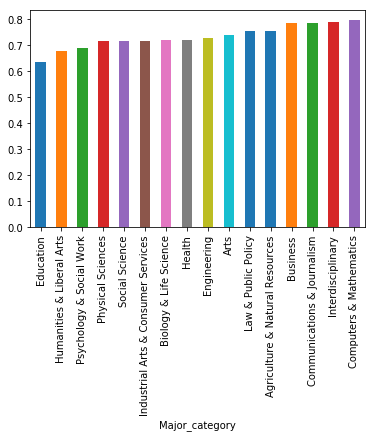

In [7]:
all_wanted.groupby('Major_category')['Employment_rate'].mean().sort_values().plot(kind='bar')

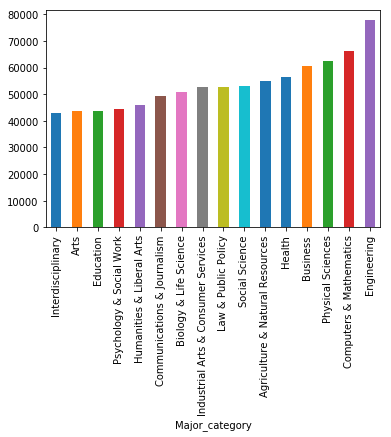

In [8]:
all_wanted.groupby('Major_category')['Median'].mean().sort_values().plot(kind='bar')

### Discussion
INSERT DISCUSSION HERE

## Relationship between employment rate and median income
Visualize a regression line between these two indicators of "successful" majors

R-Value = 0.11802219581243543


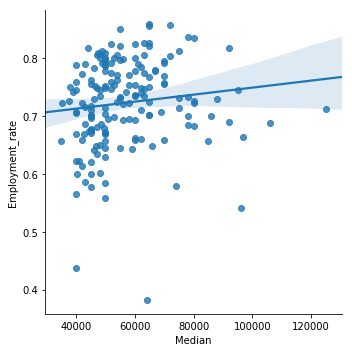

In [9]:
sns.lmplot(data=all_wanted, x='Median', y='Employment_rate')
rval = linregress(all_wanted['Median'], all_wanted['Employment_rate']).rvalue
print('R-Value = ' + str(rval))

Regression plot isn't too helpful; the scatterplot is too scattered. Second attempt: bin the data 

In [10]:
emp_med = all_wanted.copy()[['Employment_rate', 'Median']]

Text(0.5, 1.0, 'Employment Rate Histogram')

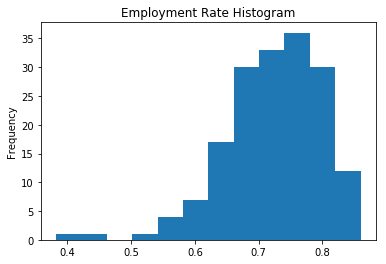

In [11]:
emp_med.Employment_rate.plot.hist(bins=12).set_title('Employment Rate Histogram')

Text(0.5, 1.0, 'Median Income Histogram')

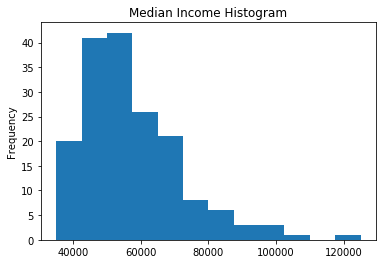

In [12]:
emp_med.Median.plot.hist(bins=12).set_title('Median Income Histogram')

In [13]:
# categorizing employment rate and median as new columns
def categorize(val):
    '''
    Categorizes the bins as 1, 2, 3, 4, 5, 6 from low to high:
    '''
    if 1 <= val <= 2:
        return 1
    if 3 <= val <= 4:
        return 2
    if 5 <= val <= 6:
        return 3
    if 7 <= val <= 8:
        return 4
    if 9 <= val <= 10:
        return 5
    return 6

emp_med['emp_binned'] = pd.qcut(emp_med['Employment_rate'], 12, labels = np.arange(1, 13)).apply(categorize)
emp_med['med_binned'] = pd.qcut(emp_med['Median'], 12, labels = np.arange(1, 13))
emp_med.head()

,Employment_rate,Median,emp_binned,med_binned
0,0.704225,50000,3,5
1,0.806338,54000,6,7
2,0.775173,63000,5,9
3,0.783948,46000,5,3
4,0.711738,62000,3,9


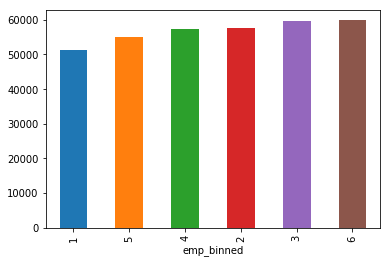

In [14]:
inc_vs_emp = emp_med.groupby('emp_binned')['Median'].mean()
inc_vs_emp.sort_values().plot.bar()

### Discussion
Even once binned, the data seems to not have a trend between employment rate and median income. The only interesting note is that the lowest employment rate bin has the lowest median income, and the highest employment rate bin has the highest median income. Perhaps with a larger sample size, there will be more interesting findings.

## What if we want to see what the best major is given certain requirements?
Naive optimization: Exploring best combo based on z-scores. Standardize each quantitative column to normalize them, sum together wanted columns.

In [15]:
def optimize(df, cols):
    '''
    Optimize major to choose based on values selected. Returns the dataframe
    rankings and the top 5 majors.
    '''
    def standardize(col):
        '''
        Convert each value in the column to it's z-score
        '''
        return (col - col.mean()) / col.std()
    
    # Get wanted input columns
    wanted = df[cols]
    
    # Apply standardization, create new df with major and category
    wanted_z = wanted.apply(standardize)
    wanted_z = pd.concat([wanted_z, df.Major], axis=1)
    wanted_z = pd.concat([wanted_z, df.Major_category], axis=1)
    
    # Sum the standardized values
    wanted_z['Sums'] = wanted_z[cols].sum(axis=1)
    
    # Create output: df_rankings and top_5
    df_rankings = wanted_z.sort_values(by='Sums', ascending=False).reset_index(drop=True)
    top_5 = wanted_z.sort_values(by='Sums', ascending=False).Major[:5].reset_index(drop=True)
    
    return df_rankings, top_5

In [16]:
# Example: best major when considering median income, employment rate, and full time rate
cols = ['Median', 'Employment_rate', 'Full_time_rate']
df_rankings, top_5 = optimize(all_wanted, cols)

print('Major rankings by columns ' + ', '.join(cols) + ': ')
display(df_rankings.head(10))
print('\nTop 5 majors by columns ' + ', '.join(cols) + ': ')
display(top_5)

Major rankings by columns Median, Employment_rate, Full_time_rate: 


,Median,Employment_rate,Full_time_rate,Major,Major_category,Sums
0,4.635146,-0.133490,0.115962,PETROLEUM ENGINEERING,Engineering,4.617619
1,3.344754,-0.455586,1.430277,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,Health,4.319445
2,1.239377,0.113157,2.865514,INDUSTRIAL AND MANUFACTURING ENGINEERING,Engineering,4.218048
3,0.424392,1.371226,2.009925,MISCELLANEOUS ENGINEERING TECHNOLOGIES,Engineering,3.805543
4,0.560223,1.805726,1.367413,COMPUTER AND INFORMATION SYSTEMS,Computers & Mathematics,3.733362
5,1.443123,1.514739,0.455729,COMPUTER SCIENCE,Computers & Mathematics,3.413591
6,1.578954,1.477116,0.344146,COMPUTER ENGINEERING,Engineering,3.400216
7,2.393939,1.246230,-0.553029,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics,3.087140
8,0.220646,1.333417,1.261510,MECHANICAL ENGINEERING RELATED TECHNOLOGIES,Engineering,2.815573
9,1.035631,1.061142,0.613151,ACTUARIAL SCIENCE,Business,2.709924



Top 5 majors by columns Median, Employment_rate, Full_time_rate: 


0                                PETROLEUM ENGINEERING
1    PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...
2             INDUSTRIAL AND MANUFACTURING ENGINEERING
3               MISCELLANEOUS ENGINEERING TECHNOLOGIES
4                     COMPUTER AND INFORMATION SYSTEMS
Name: Major, dtype: object

What if we wanted to add weights to columns we care more about? Let's introduce a simple ranking system for the columns.

In [17]:
def optimize_weights(df, cols, rankings):
    '''
    Optimize major to choose based on values selected. Returns the dataframe
    rankings and the top 5 majors.
    :param df: input df with major data
    :param cols: columns we care about
    :param rankings: list of rankings for the input columns
    '''
    assert (len(cols) == len(rankings)), 'Number of columns and rankings should be the same' 
    assert (max(rankings) == len(cols)), 'Max rank should be the length of the columns'
    assert (min(rankings) == 1),         'Min rank must be 1' 
    
    def standardize(col):
        '''
        Convert each value in the column to it's z-score
        '''
        return (col - col.mean()) / col.std()
    
    def weight(ser):
        '''
        Assign a general weight system to the rankings
        Example: 4 columns ['A', 'B', 'C'] with rankings [1, 2, 3]
        Weights assigned would be {'A': 1.3, 'B': 1.15, 'C': 1}
        '''
        weights = [(1 + (x * 0.15)) for x in range(len(ser))]
        weights_dct = dict(zip(ser.index, weights))
        return weights_dct
    
    # convert rankings/columns into a series
    rankings_ser = pd.Series(rankings, index=cols).sort_values(ascending=False)
    weights = weight(rankings_ser)
    
    # Get wanted input columns
    wanted = df[cols]
    
    # Apply standardization, multiply weights, create new df with major and category
    wanted_z = wanted.apply(standardize)
    for col in cols:
        wanted_z[col] = wanted_z[col] * weights[col]
    wanted_z = pd.concat([wanted_z, df.Major], axis=1)
    wanted_z = pd.concat([wanted_z, df.Major_category], axis=1)
    
    # Sum the standardized values
    wanted_z['Sums'] = wanted_z[cols].sum(axis=1)
    
    # Create output: df_rankings and top_5
    df_rankings = wanted_z.sort_values(by='Sums', ascending=False).reset_index(drop=True)
    top_5 = wanted_z.sort_values(by='Sums', ascending=False).Major[:5].reset_index(drop=True)
    
    return df_rankings, top_5, weights

In [18]:
# Example: best major when considering median income, employment rate, and full time rate
cols = ['Median', 'Employment_rate', 'Full_time_rate']
rankings = [3, 1, 2]
df_rankings, top_5, weights = optimize_weights(all_wanted, cols, rankings)

print('Major rankings by columns ' + ', '.join(cols) + ': ')
display(df_rankings.head(10))
print('\nTop 5 majors by columns ' + ', '.join(cols) + ': ')
display(top_5)
print('\nWeights: ' + str(weights))

Major rankings by columns Median, Employment_rate, Full_time_rate: 


,Median,Employment_rate,Full_time_rate,Major,Major_category,Sums
0,1.239377,0.147104,3.295341,INDUSTRIAL AND MANUFACTURING ENGINEERING,Engineering,4.681822
1,4.635146,-0.173537,0.133357,PETROLEUM ENGINEERING,Engineering,4.594966
2,0.424392,1.782594,2.311413,MISCELLANEOUS ENGINEERING TECHNOLOGIES,Engineering,4.518399
3,0.560223,2.347443,1.572525,COMPUTER AND INFORMATION SYSTEMS,Computers & Mathematics,4.480192
4,3.344754,-0.592262,1.644819,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,Health,4.397311
5,1.443123,1.969161,0.524088,COMPUTER SCIENCE,Computers & Mathematics,3.936372
6,1.578954,1.920251,0.395768,COMPUTER ENGINEERING,Engineering,3.894973
7,0.220646,1.733442,1.450736,MECHANICAL ENGINEERING RELATED TECHNOLOGIES,Engineering,3.404825
8,2.393939,1.620099,-0.635983,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics,3.378055
9,1.035631,2.319150,-0.213084,MANAGEMENT INFORMATION SYSTEMS AND STATISTICS,Business,3.141697



Top 5 majors by columns Median, Employment_rate, Full_time_rate: 


0             INDUSTRIAL AND MANUFACTURING ENGINEERING
1                                PETROLEUM ENGINEERING
2               MISCELLANEOUS ENGINEERING TECHNOLOGIES
3                     COMPUTER AND INFORMATION SYSTEMS
4    PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...
Name: Major, dtype: object


Weights: {'Median': 1.0, 'Full_time_rate': 1.15, 'Employment_rate': 1.3}


### Discussion:
INSERT DISCUSSION HERE

## What is the male to female ratio for popular majors?

INSERT INTRO HERE

In [19]:
## looking at the data
all_wanted.head()

,Major,Major_category,Median,P25th,P75th,Total,Employment_rate,Full_time_rate,Part_time_rate,PercentWomen,Unemployment_rate
0,GENERAL AGRICULTURE,Agriculture & Natural Resources,50000,34000,80000.0,128148,0.704225,0.790509,0.115434,0.120564,0.295775
1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,54000,36000,80000.0,95326,0.806338,0.735450,0.224868,0.101852,0.193662
2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,63000,40000,98000.0,33955,0.775173,0.651869,0.155374,0.153037,0.224827
3,ANIMAL SCIENCES,Agriculture & Natural Resources,46000,30000,72000.0,103549,0.783948,0.849762,0.119237,0.107313,0.216052
4,FOOD SCIENCE,Agriculture & Natural Resources,62000,38500,90000.0,24280,0.711738,0.718227,0.160570,0.341631,0.288262


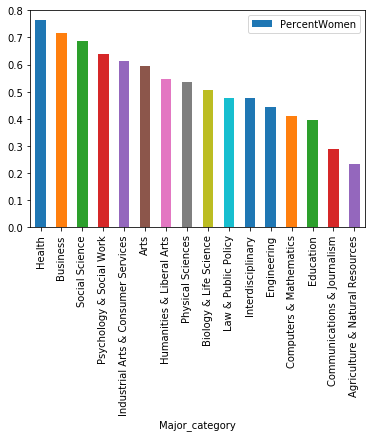

In [20]:
#proportion of women in each major category
proportion_women = all_wanted.groupby('Major_category').mean().reset_index()
proportion_women = proportion_women.sort_values('PercentWomen', ascending = False)
proportion_women.plot(kind='bar', x='Major_category', y='PercentWomen')

### Correlation between proportion of women vs other factors
let's see if theres a correlation between %women and other factors for each major

R-Value = 0.011109429209186594


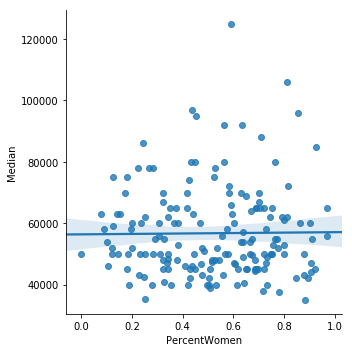

In [21]:
# linregress plot for median income and percent women in each major
sns.lmplot(data=all_wanted, x='PercentWomen', y='Median')
rval = linregress(all_wanted['PercentWomen'], all_wanted['Median']).rvalue
print('R-Value = ' + str(rval))

INSERT OBSERVATIONS HERE:
little/ no correlation

R-Value = 0.11128981367778752


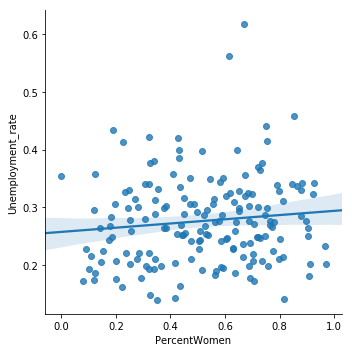

In [22]:
# linregress plot for unemployment rate and percent women in each major
sns.lmplot(data=all_wanted, x='PercentWomen', y='Unemployment_rate')
rval = linregress(all_wanted['PercentWomen'], all_wanted['Unemployment_rate']).rvalue
print('R-Value = ' + str(rval))

INSERT OBSERVATIONS HERE:
not enough correlation for %women vs unemployment rate

R-Value = -0.43444282080360086


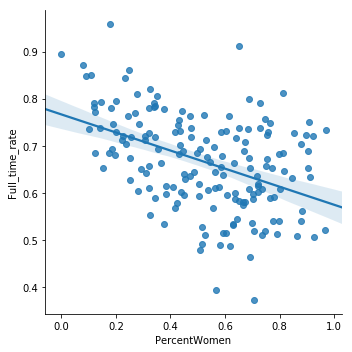

In [23]:
# linregress plot for full time rate and percent women in each major
sns.lmplot(data=all_wanted, x='PercentWomen', y='Full_time_rate')
rval = linregress(all_wanted['PercentWomen'], all_wanted['Full_time_rate']).rvalue
print('R-Value = ' + str(rval))

INSERT OBSERVATIONS HERE: 
moderate negative correlation between full_time_rate and percentage women in each major

### Using the optimization model

using optimizaiton model, we can compare each major success with the proportion of women within each major category

for this portion, we consider the factors of median salary, employment rate, and full-time rate in our calculations.

,Median,Employment_rate,Full_time_rate,Major,Major_category,Sums
0,4.635146,-0.133490,0.115962,PETROLEUM ENGINEERING,Engineering,4.617619
1,3.344754,-0.455586,1.430277,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,Health,4.319445
2,1.239377,0.113157,2.865514,INDUSTRIAL AND MANUFACTURING ENGINEERING,Engineering,4.218048
3,0.424392,1.371226,2.009925,MISCELLANEOUS ENGINEERING TECHNOLOGIES,Engineering,3.805543
4,0.560223,1.805726,1.367413,COMPUTER AND INFORMATION SYSTEMS,Computers & Mathematics,3.733362


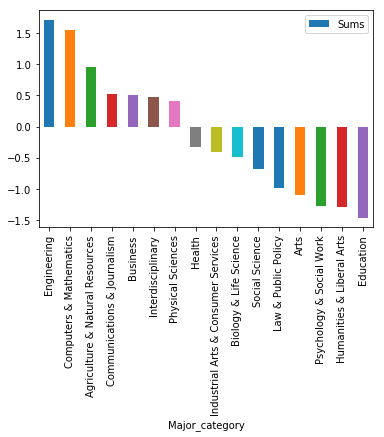

In [24]:
# using the optimize method above, optimize majors
cols = ['Median', 'Employment_rate', 'Full_time_rate']
rankings, top_5 = optimize(all_wanted, cols)

#plot based on each major category
rankings.groupby('Major_category').mean().reset_index().sort_values('Sums', ascending = False).plot(kind='bar', x='Major_category', y='Sums')

#dataframe shows top majors
rankings.head()

,Major,Major_category,Median,P25th,P75th,Total,Employment_rate,Full_time_rate,Part_time_rate,PercentWomen,Unemployment_rate
163,MARKETING AND MARKETING RESEARCH,Business,56000,38500,90000.0,1114624,0.798588,0.733433,0.186251,0.968954,0.201412
162,BUSINESS ECONOMICS,Business,65000,45000,100000.0,75547,0.767509,0.521827,0.362131,0.967998,0.232491
50,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,Engineering,85000,55000,125000.0,6264,0.657727,0.507327,0.369235,0.927807,0.342273
137,FINE ARTS,Arts,45000,30000,70000.0,571961,0.676551,0.720915,0.222197,0.923745,0.323449
149,MEDICAL ASSISTING SERVICES,Health,55000,37000,75000.0,64316,0.797298,0.633558,0.273650,0.910933,0.202702


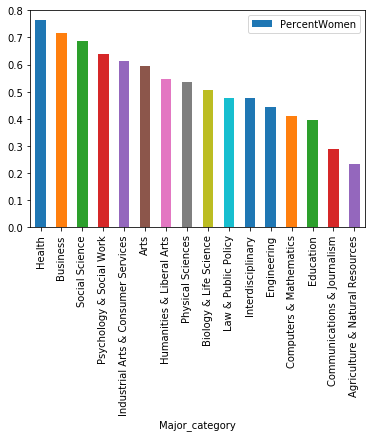

In [25]:
# proportion of women in each major
top_women = all_wanted.sort_values('PercentWomen', ascending=False)

#plot based on major category
top_women.groupby('Major_category').mean().reset_index().sort_values('PercentWomen', ascending = False).plot(kind='bar', x='Major_category', y='PercentWomen')

#df shows majors with most women to least women
top_women.head()

In [26]:
# is there a correlation between the 2?
combined = pd.merge(rankings, top_women, on='Major')
corr = rankings['Sums'].corr(top_women['PercentWomen'])
corr

-0.6466473849773962

R-Value = -0.30526030174926694


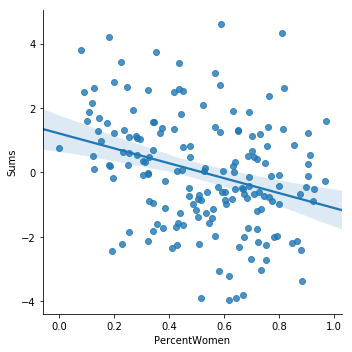

In [27]:
# linregress plot
sns.lmplot(data=combined, x='PercentWomen', y='Sums')
rval = linregress(combined['PercentWomen'], combined['Sums']).rvalue
print('R-Value = ' + str(rval))

## Discussion
INSERT DISCUSSION HERE

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*